# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yangor
City not found. Skipping...
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | hajiganj
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | mangrol
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | jagatsinghapur
Processing Record 9 of Set 1 | yayci
City not found. Skipping...
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | am djarass
City not found. Skipping...
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | kariba
Processing Record 18 of Set 1 | imbituba
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | fort mcmurray
Processing Record 21 of Set 1

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,79.72,73,1,11.65,JP,1730687005
1,hajiganj,23.2511,90.8592,76.12,70,0,5.12,BD,1730687007
2,invercargill,-46.4000,168.3500,63.01,61,100,11.01,NZ,1730687008
3,mangrol,21.1167,70.1167,78.69,52,2,6.51,IN,1730687009
4,constantia,44.1833,28.6500,32.68,49,3,11.50,RO,1730686779


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,79.72,73,1,11.65,JP,1730687005
1,hajiganj,23.2511,90.8592,76.12,70,0,5.12,BD,1730687007
2,invercargill,-46.4000,168.3500,63.01,61,100,11.01,NZ,1730687008
3,mangrol,21.1167,70.1167,78.69,52,2,6.51,IN,1730687009
4,constantia,44.1833,28.6500,32.68,49,3,11.50,RO,1730686779
5,namibe,-15.1961,12.1522,66.87,84,100,4.34,AO,1730687011
6,jagatsinghapur,20.2667,86.1667,76.05,71,7,3.71,IN,1730687013
7,atafu village,-8.5421,-172.5159,82.94,74,94,11.27,TK,1730687015
8,georgetown,5.4112,100.3354,85.95,75,20,5.01,MY,1730686828


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

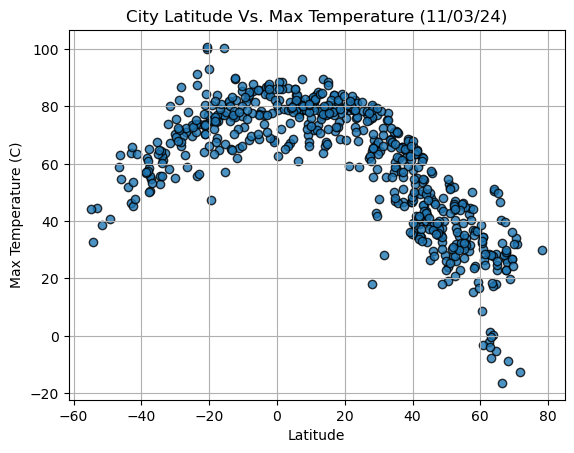

In [27]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
plt.scatter(latitude,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
    # date foramtt 2024-11-03 ??
    # need to convert celsius?
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

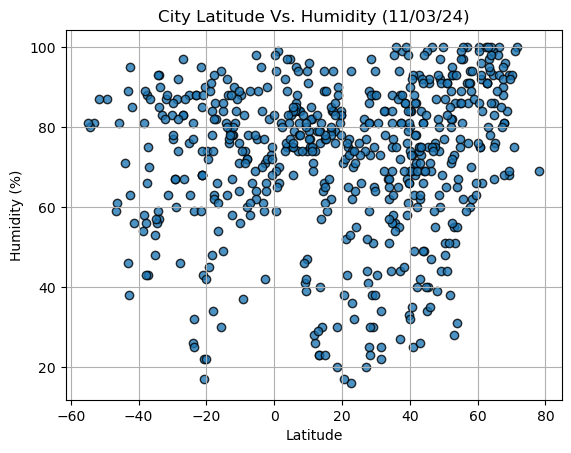

In [41]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

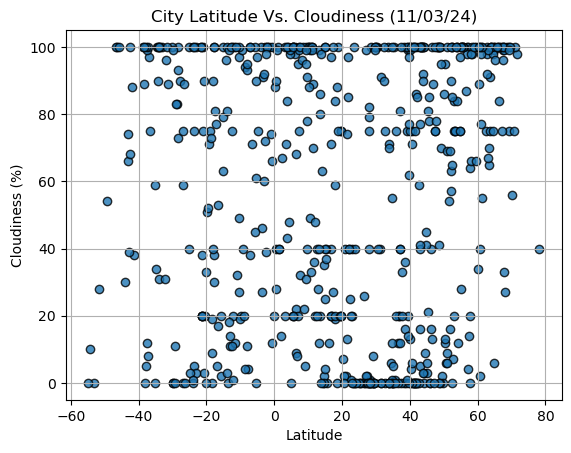

In [33]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

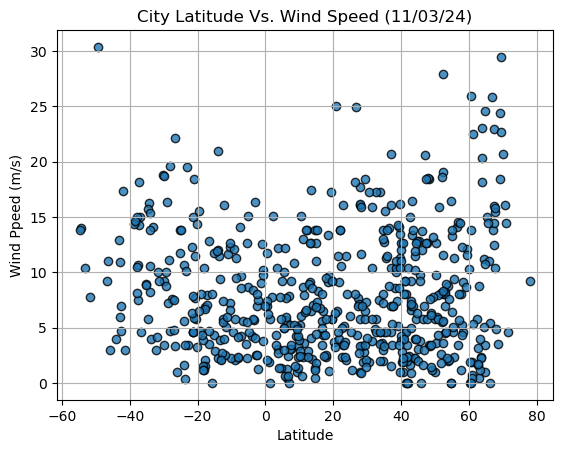

In [39]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# convert mph >> m/s

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Ppeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Regression line equation to run for each plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    #plt.xlabel("Latitude")
    #plt.ylabel("Title")
    print(f"The r^2-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


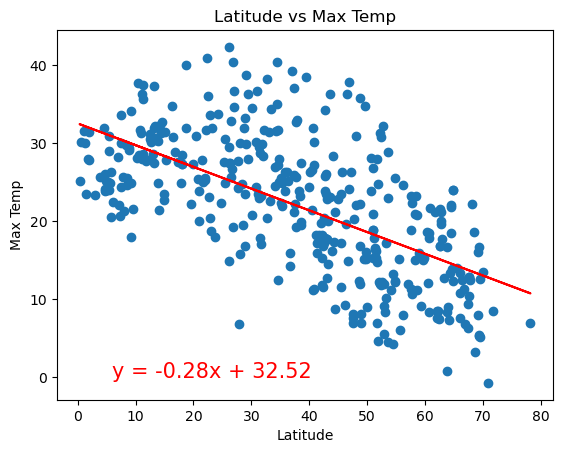

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
# regres line bottom left

The r^2-value is: 0.6720220238897325


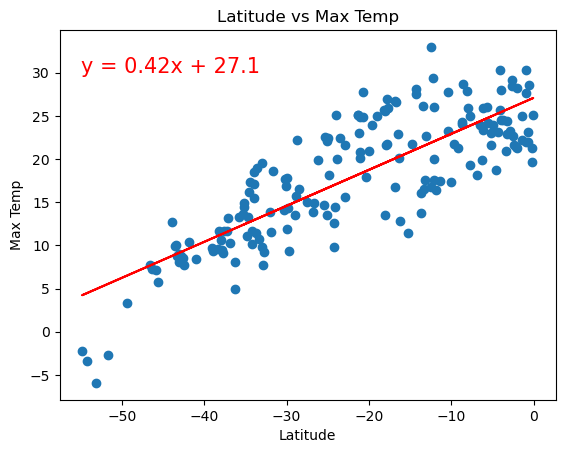

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
# regres line top left

**Discussion about the linear relationship:** 
Northern Hemispere plot r-value (correlation coefficient) =  0.3940754297489331. The r-value for the northern hemispehere plot indicates a weak positive correlation between max temp and latitude. As values of latitude increase, the values of max temp decrease in value. In other words, the maximum temperature is cooler the closer one approches the north pole.

Southern Hemisphere plot r-value (correlation coefficient) =  0.6720220238897325. The r-value for the southern hemisphere plot indicates a stronger correlation between Max temp and latitude, when compared to the northern hemispehere plot. As values of latitude increase, the max temp increases in value. In other words, the closer one appraoches the equator the warmer the temperature becomes.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


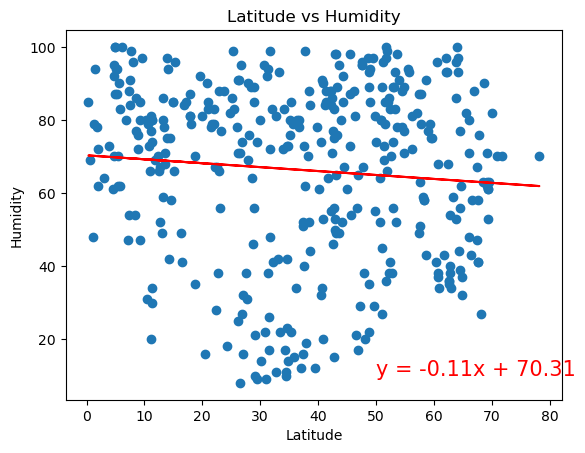

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# regres line bottom right

The r^2-value is: 0.00014367159540169783


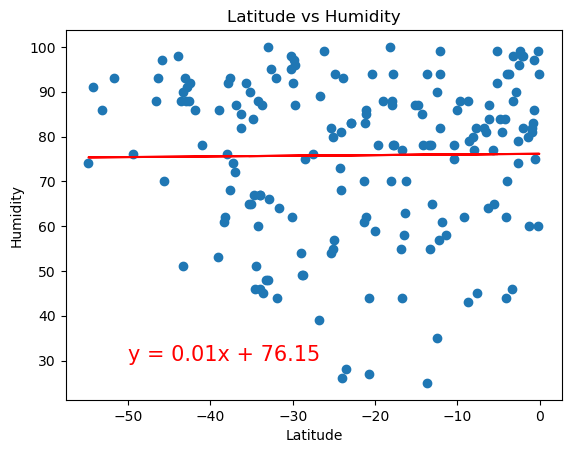

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# regres line bottom left

**Discussion about the linear relationship:** 
Northern Hemispere plot r-value (correlation coefficient) =  0.007659599322853922. The r-value as indicated by the plot is very close to zero (0), and signifies that there is little to no correlation between humidity and latitude.

Southern Hemisphere plot r-value (correlation coefficient) = 0.00014367159540169783. The r-value for the southern hemisphere plot is even closer to zero (0), and signifies that there is little to no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


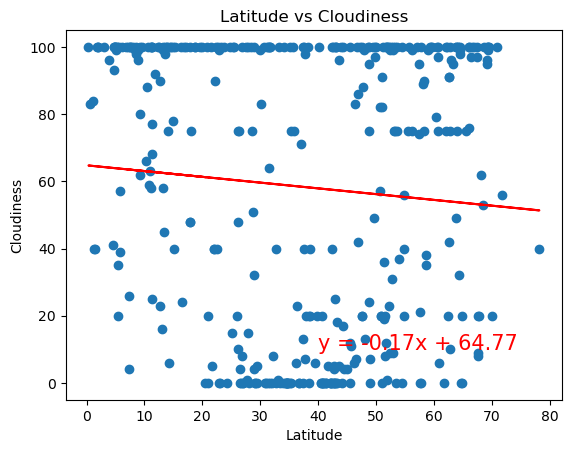

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# regres line bottom right

The r^2-value is: 0.018616831531634456


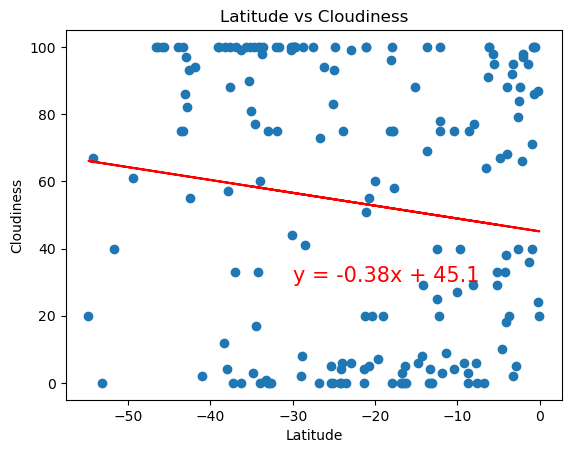

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# regres line bottom right

**Discussion about the linear relationship:**
Northern Hemispere plot r-value (correlation coefficient) =  0.006456908379763574.  The r-value as indicated by the northern hemisphere plot is very close to zero (0), and signifies that there is little to no correlation between cloudiness and latitude.

Southern Hemisphere plot r-value (correlation coefficient) = 0.018616831531634456. The r-value for the southern hemisphere plot is also close zero (0), and indicates that there is little to no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


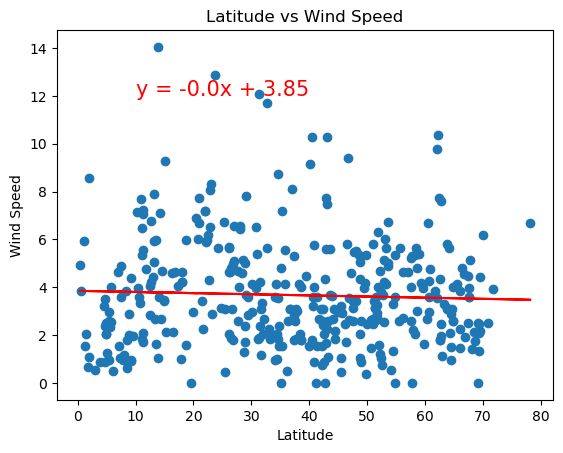

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# regres line top left

The r^2-value is: 0.06495869418886388


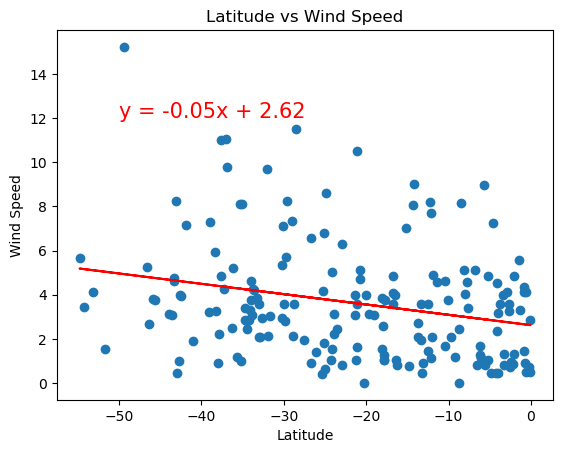

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# regres line top left

**Discussion about the linear relationship:**
Northern Hemispere plot r-value (correlation coefficient) =  0.0017236249523139959. The r-value as indicated by the northern hemisphere plot is very close to zero (0), and indicates that there is almost no correlation between wind speed and latitude.

Southern Hemisphere plot r-value (correlation coefficient) = 0.06495869418886388. The r-value for the southern hemisphere plot is also close zero (0), and indicates that there is little to no correlation between wind speed and latitude.